In [1]:
%matplotlib inline

In [2]:
import os
import streamlit as st 
import pandas as pd
import numpy as np

In [3]:
%pwd

'c:\\Users\\ankita\\Desktop\\Personal_Project\\Olympics_all_in_all\\olympics-all-in-all\\research'

In [4]:
os.chdir("../")

In [5]:
df = pd.read_csv('artifacts/data_ingestion/athlete_events.csv')
region_df = pd.read_csv('artifacts/data_ingestion/noc_regions.csv')

In [6]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [7]:
preprocessed_df = (df.query("Season == 'Summer'")
                    .merge(region_df, on = 'NOC', how = 'left')
                    )
preprocessed_df.drop_duplicates(inplace=True)


In [8]:
preprocessed_df = pd.concat([preprocessed_df, pd.get_dummies(preprocessed_df['Medal'], dtype= int)], axis = 1)

In [9]:
preprocessed_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [10]:
olympics_summer_data =df.query('Season == "Summer"')

In [11]:
olympics_summer_data.shape

(222552, 15)

In [12]:
olympics_summer_data.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN


In [13]:
region_df.tail()

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


In [14]:
olympics_summer_data = olympics_summer_data.merge(region_df, on ='NOC', how = 'left')

In [15]:
olympics_summer_data.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222551,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Belarus,NaN


In [16]:
olympics_summer_data['region'].unique().shape

(206,)

In [17]:
olympics_summer_data['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [18]:
olympics_summer_data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [19]:
olympics_summer_data.duplicated().sum()

np.int64(1385)

In [20]:
olympics_summer_data.drop_duplicates(inplace = True)

In [21]:
olympics_summer_data['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [22]:
olympics_summer_data['Medal'].isna().sum()

np.int64(187090)

In [23]:
pd.get_dummies(olympics_summer_data['Medal'],dtype=int)

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
222547,0,0,0
222548,0,0,0
222549,0,0,0
222550,0,0,0


In [24]:
olympics_summer_data=pd.concat([olympics_summer_data, pd.get_dummies(olympics_summer_data['Medal'],dtype=int)], axis = 1)

In [25]:
olympics_summer_data.groupby('region').sum()[['Gold','Silver', 'Bronze']].sort_values('Gold', ascending= False).reindex()

,Gold,Silver,Bronze
region,,,
USA,2472,1333,1197
Russia,1220,974,994
Germany,1075,987,1064
UK,635,729,620
Italy,518,474,454
...,...,...,...
Vanuatu,0,0,0
"Virgin Islands, British",0,0,0
"Virgin Islands, US",0,1,0


In [26]:
medal_tally = olympics_summer_data.drop_duplicates(subset =['Team','NOC','Games','Year','City','Sport','Event','Medal'])
medal_tally = medal_tally.groupby('region').sum()[['Gold','Silver', 'Bronze']].sort_values('Gold', ascending= False).reindex()

In [27]:
medal_tally['Total'] = medal_tally['Gold']+ medal_tally['Silver']+medal_tally['Bronze']

In [28]:
medal_tally

,Gold,Silver,Bronze,Total
region,,,,
USA,1035,802,708,2545
Russia,592,498,487,1577
Germany,444,457,491,1392
UK,278,317,300,895
France,234,256,287,777
...,...,...,...,...
Vanuatu,0,0,0,0
"Virgin Islands, British",0,0,0,0
"Virgin Islands, US",0,1,0,1


In [29]:
#got all the unique years
years = olympics_summer_data['Year'].unique().tolist()
years.sort()
years.insert(0,"Overall")

In [30]:
#unique countries
unique_countries = np.unique(olympics_summer_data['region'].dropna().values).tolist()
unique_countries.sort()
unique_countries.insert(0, "Overall")

In [31]:
medal_df = olympics_summer_data.drop_duplicates(subset =['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [32]:
def filter_medal_tally(years, unique_countries):
    flag = 0
    medal_df = olympics_summer_data.drop_duplicates(subset =['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    if years.isdigit():
        years = int(years)
    if years == "Overall" and unique_countries == "Overall":
        temp_df = medal_df
    if years == "Overall" and unique_countries != "Overall":
        flag = 1
        temp_df = medal_df.query("region == @unique_countries")
    if years != "Overall" and unique_countries == "Overall":
        temp_df = medal_df.query("Year == @years")
    if years!= "Overall" and unique_countries != "Overall":
        temp_df = medal_df.query('Year == @years and region == @unique_countries')
    if flag == 1:   
        x =temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year', ascending=True).reset_index()
    else:
        x =temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold', ascending=False).reset_index()
    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']
    print(x)

In [33]:
filter_medal_tally(years= 'Overall', unique_countries='USA')

    Year  Gold  Silver  Bronze  total
0   1896    11       6       2     19
1   1900    21      16      17     54
2   1904    76      79      76    231
3   1906    12       5       6     23
4   1908    22      12      12     46
5   1912    26      18      19     63
6   1920    41      27      27     95
7   1924    45      27      27     99
8   1928    22      18      16     56
9   1932    44      36      30    110
10  1936    24      21      12     57
11  1948    38      27      19     84
12  1952    40      19      17     76
13  1956    32      25      17     74
14  1960    34      21      16     71
15  1964    36      26      28     90
16  1968    45      28      34    107
17  1972    33      31      30     94
18  1976    34      35      25     94
19  1984    82      61      30    173
20  1988    36      31      27     94
21  1992    37      34      37    108
22  1996    44      32      25    101
23  2000    36      24      31     91
24  2004    36      39      26    101
25  2008    

#### Overall Analysis

* No.of editions
* No. of cities
* No. of events/sports
* No. of atheletes
* participating nations

In [34]:
print(olympics_summer_data.columns)

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes',
       'Bronze', 'Gold', 'Silver'],
      dtype='object')


In [35]:
## Overall Analysis
len(olympics_summer_data['Year'].unique())

29

In [36]:
olympics_summer_data['City'].unique().shape

(23,)

In [37]:
olympics_summer_data['Event'].unique().shape

(651,)

In [38]:
olympics_summer_data['Name'].unique().shape

(116122,)

In [39]:
olympics_summer_data['region'].unique().shape

(206,)

In [40]:
olympics_summer_data.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222551,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Belarus,NaN,0,0,0


In [41]:
## Line plot to see nations participated in olympics
years_vs_no_of_nation = olympics_summer_data.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')
years_vs_no_of_nation.rename(columns = {'Year' : 'Edition','count':'no of nation'}, inplace=True)

In [42]:
years_vs_no_of_nation

,Edition,no of nation
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
23,1912,29
24,1920,29
21,1924,45
20,1928,46
19,1932,47


In [43]:
import plotly.express as px

In [44]:
fig =px.line(years_vs_no_of_nation, x ="Edition", y = 'no of nation')
fig.show()

In [45]:
# no of events over the years
years_vs_no_of_nation = olympics_summer_data.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('Year')
years_vs_no_of_nation.rename(columns = {'Year' : 'Edition','count':'no of Events'}, inplace=True)

In [46]:
fig =px.line(years_vs_no_of_nation, x ="Edition", y = 'no of Events')
fig.show()

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

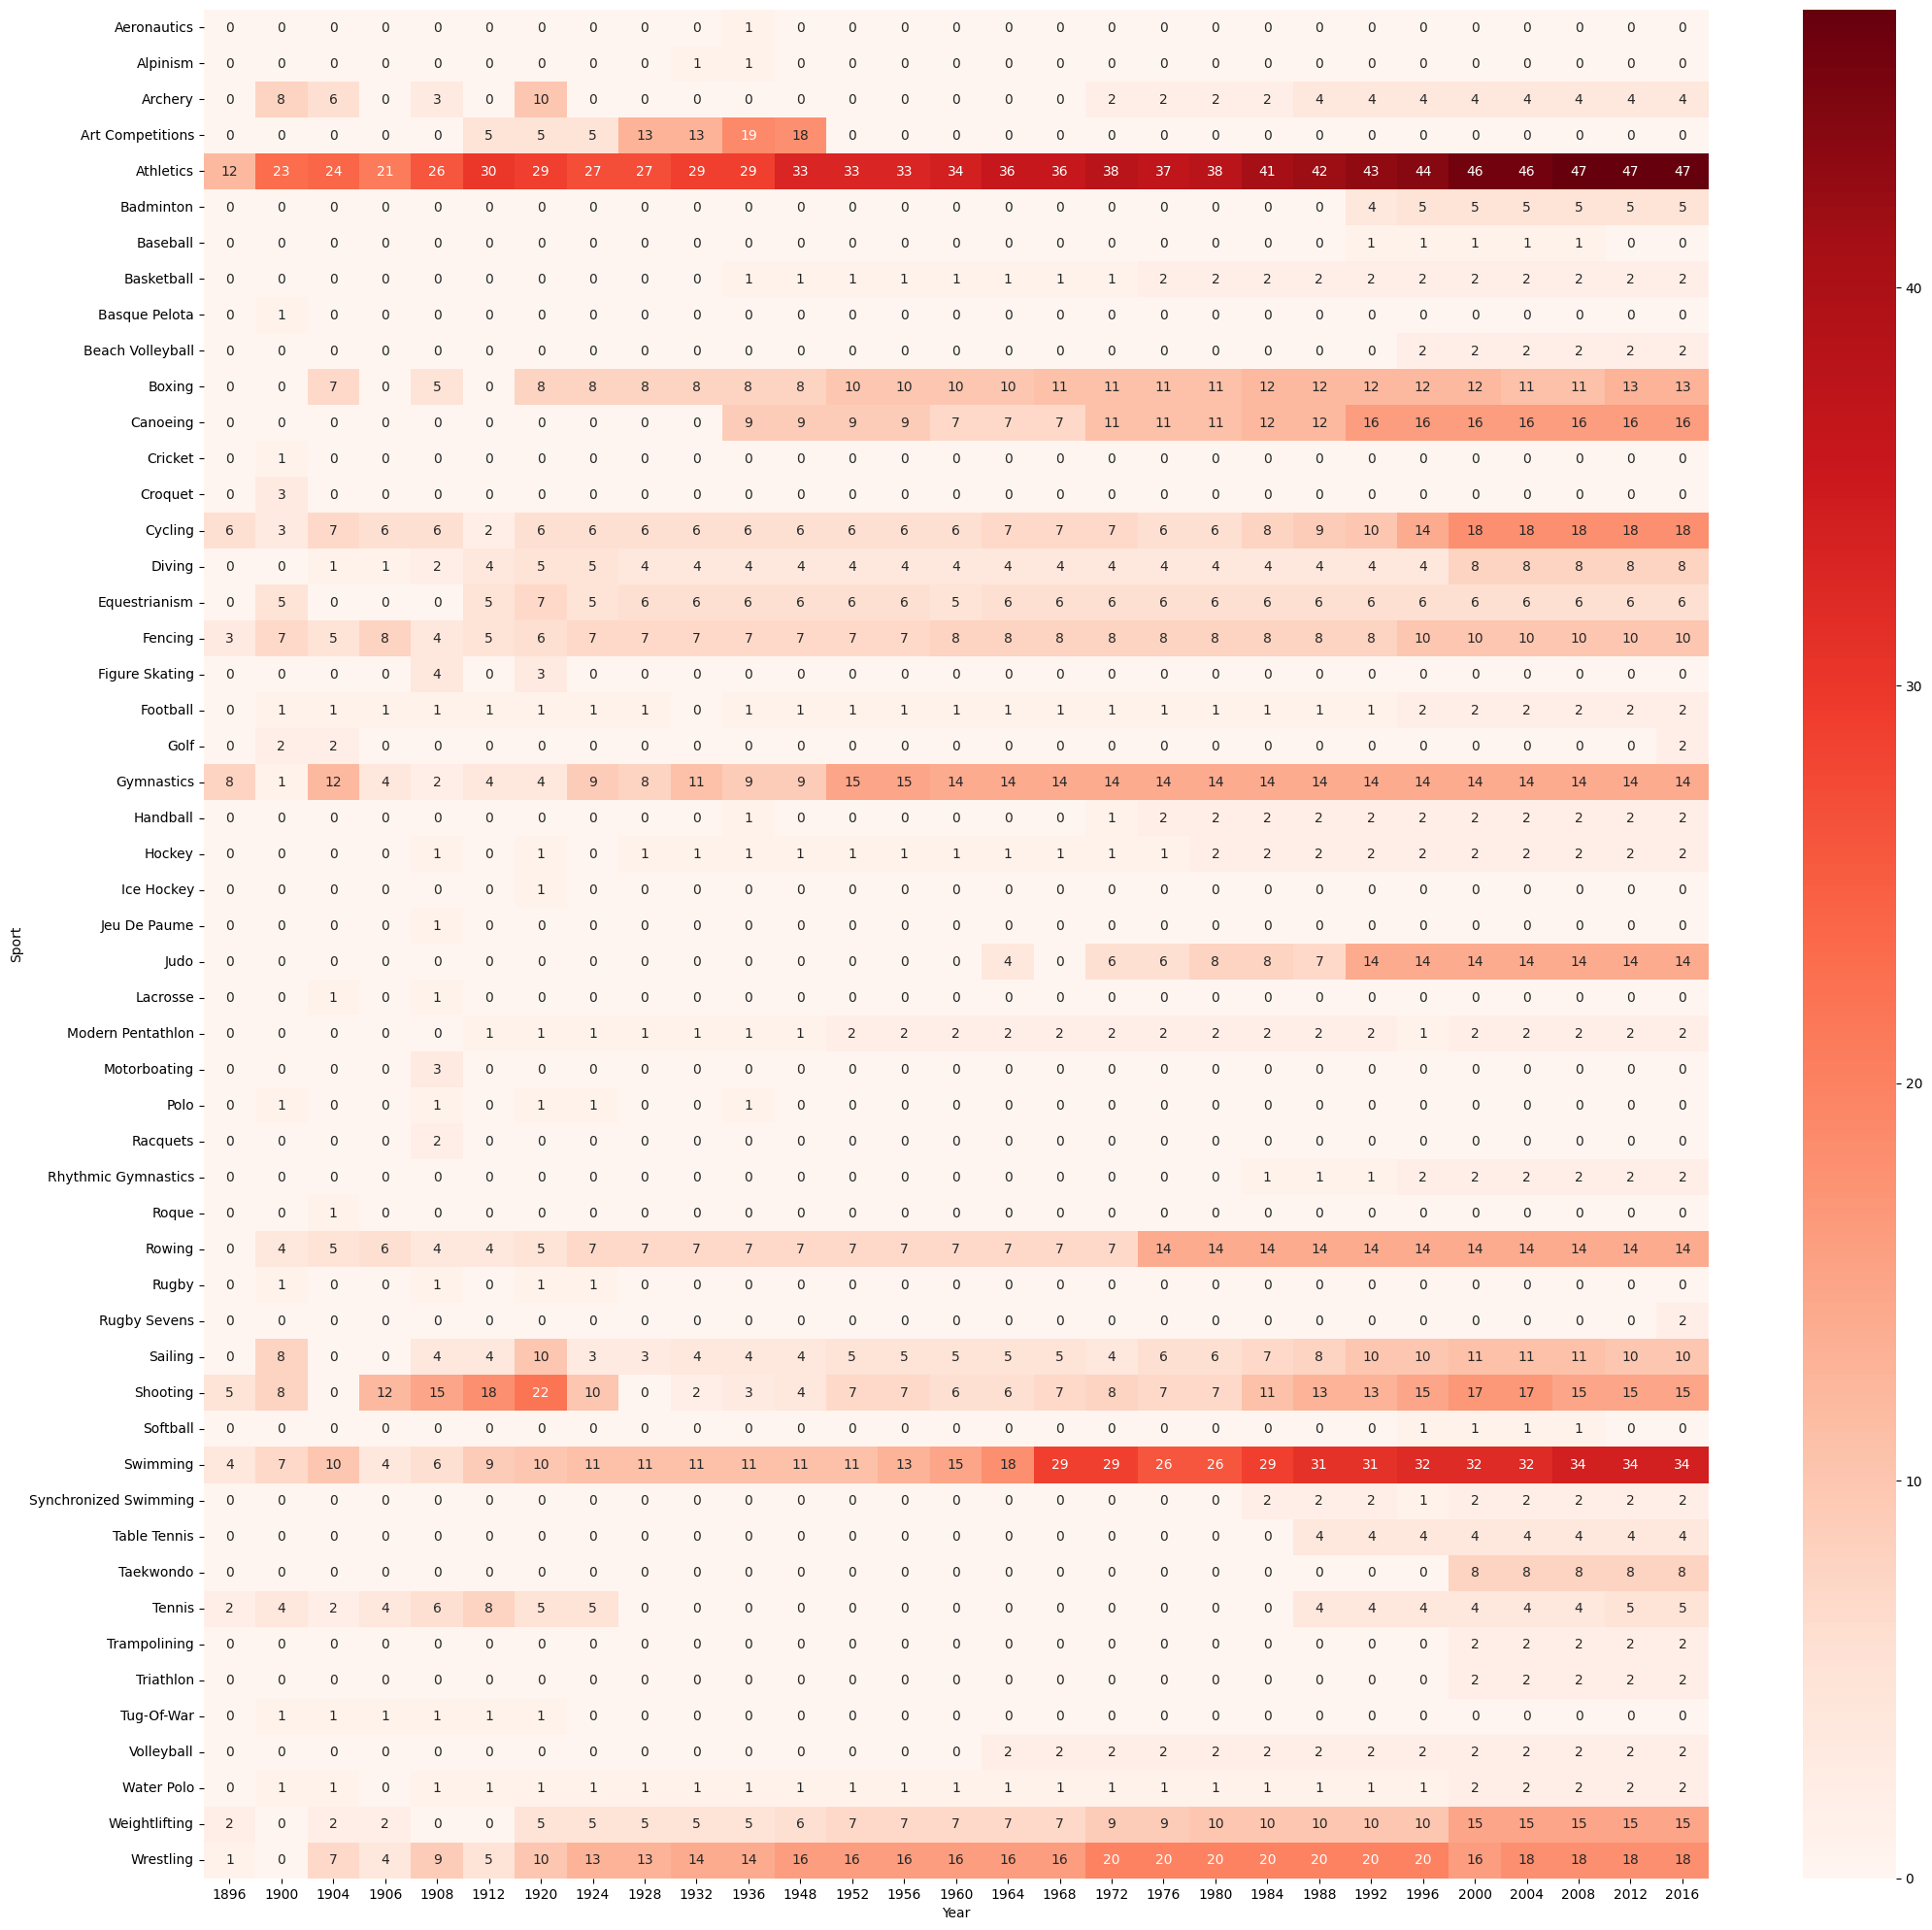

In [48]:
x = olympics_summer_data.drop_duplicates(['Year','Sport','Event'])
pivot_table = x.pivot_table(index = 'Sport', columns='Year', values = 'Event', aggfunc= 'count').fillna(0).astype(int)

plt.figure(figsize= (25,25))
sns.heatmap(pivot_table, cmap = 'Reds', annot = True)
plt.show()


In [49]:
olympics_summer_data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes',
       'Bronze', 'Gold', 'Silver'],
      dtype='object')

In [50]:
temp_df = df.dropna(subset =['Medal'])
temp_df = temp_df.query("Sport != 'Overall'")
temp =temp_df['Name'].value_counts().reset_index()
print(temp)

                                     Name  count
0                 Michael Fred Phelps, II     28
1      Larysa Semenivna Latynina (Diriy-)     18
2            Nikolay Yefimovich Andrianov     15
3                     Ole Einar Bjrndalen     13
4             Borys Anfiyanovych Shakhlin     13
...                                   ...    ...
28197              Jos Mara Abarca Plotas      1
28198                Stephen Anthony Abas      1
28199             Alejandro Abascal Garca      1
28200             Jos Manuel Abascal Gmez      1
28201               Dimitrios Thanopoulos      1

[28202 rows x 2 columns]


In [51]:
def most_sucessful_athletes(df, sport):
    temp_df = df.dropna(subset =['Medal'])
    
    if sport != "Overall":
        temp_df = temp_df.query("Sport == @sport")
    temp_df = (
        temp_df['Name'].value_counts()
                .reset_index()
                .head(15)
                .merge(df, left_on = 'Name', right_on = 'Name', how ='left')[['Name','count','Sport','region']]
                .drop_duplicates('Name')
            )
    temp_df.rename(columns= {'count': 'Medals'})
    
         
    return temp_df

In [52]:
most_sucessful_athletes(olympics_summer_data, 'Swimming')

,Name,count,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Ryan Steven Lochte,12,Swimming,USA
44,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
61,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
74,Natalie Anne Coughlin (-Hall),12,Swimming,USA
86,Mark Andrew Spitz,11,Swimming,USA
98,"Matthew Nicholas ""Matt"" Biondi",11,Swimming,USA
110,Franziska van Almsick,10,Swimming,Germany
133,"Gary Wayne Hall, Jr.",10,Swimming,USA
143,Aleksandr Vladimirovich Popov,9,Swimming,Russia


## Country wise
* Countrywise medal tally per year(line plot)
* What countries are good at heatmap
* Most sucessfull Atheletes(Top  10)

In [53]:
temp_df = olympics_summer_data.dropna(subset = ['Medal'])
temp_df.drop_duplicates(subset = ['Team','NOC', 'Games','Year','City','Sport','Event','Medal'], inplace= True)


C:\Users\ankita\AppData\Local\Temp\ipykernel_1856\3810825870.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
country_wise_medal_tally_every_year = temp_df.query("region == 'USA'")
country_wise_medal_tally_every_year.groupby('Year').count()['Medal'].reset_index()

,Year,Medal
0,1896,19
1,1900,54
2,1904,231
3,1906,23
4,1908,46
5,1912,63
6,1920,95
7,1924,99
8,1928,56
9,1932,110


<Axes: xlabel='Year', ylabel='Sport'>

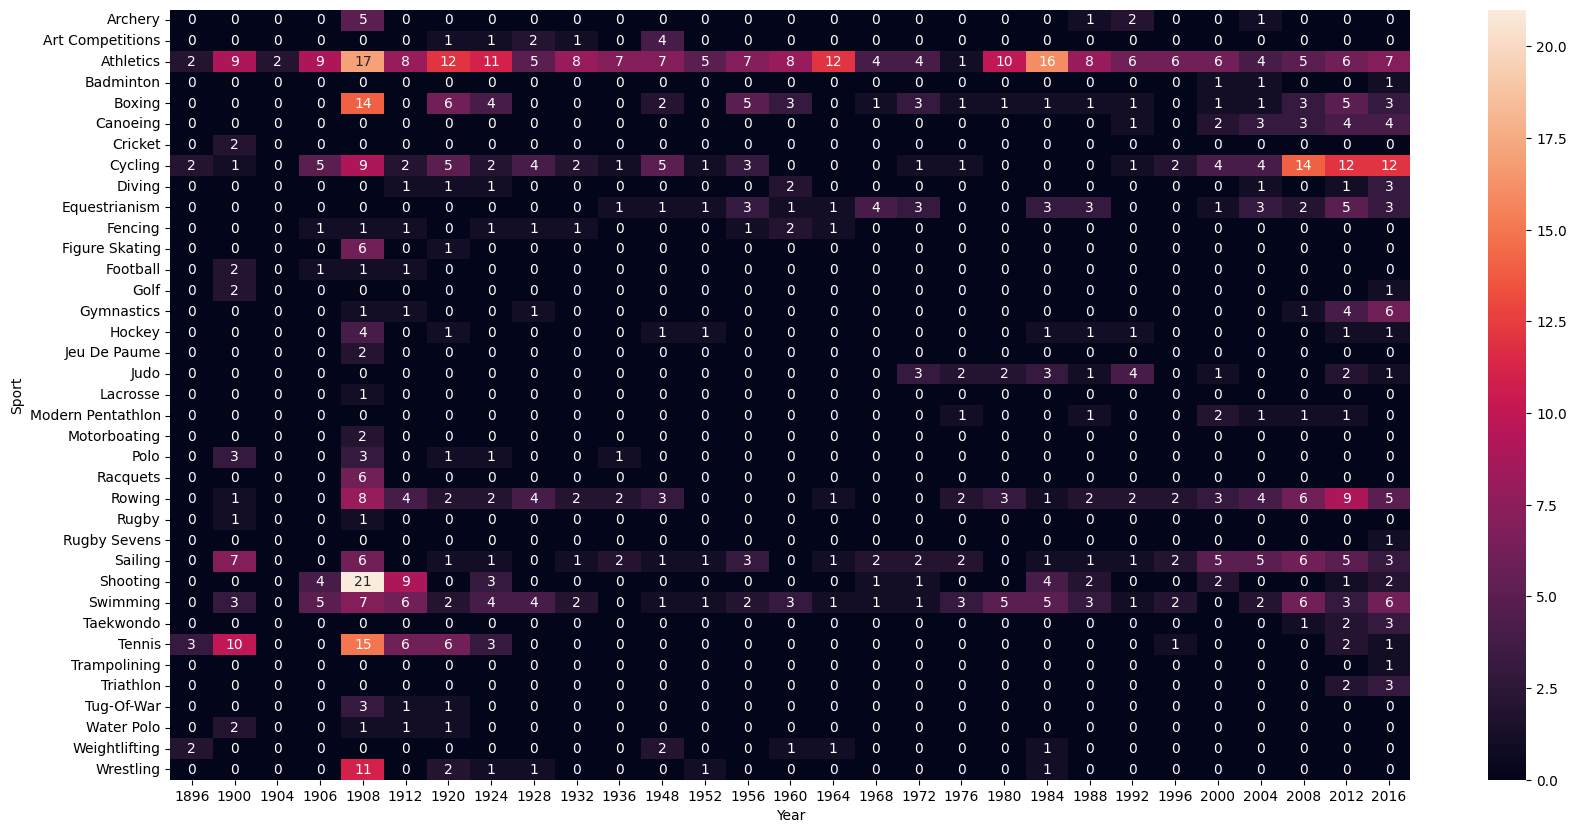

In [55]:
new_df = temp_df.query('region == "UK"')
sports_wise_count = new_df.pivot_table(index ='Sport', columns ='Year', values ='Medal', aggfunc ='count').fillna(0)
plt.figure(figsize =(20,10))
sns.heatmap(sports_wise_count, annot =True)

In [56]:
def most_sucessful_athletes_country_wise(df:pd.DataFrame, region:str):
    temp_df = df.dropna(subset =['Medal'])
    
    
    althlete_based_on_region = temp_df.query("region == @region")
    top_10_althlete_based_on_region = (
        althlete_based_on_region['Name'].value_counts()
                .reset_index()
                .head(10)
                .merge(df, left_on = 'Name', right_on = 'Name', how ='left')[['Name','count','Sport']]
                .drop_duplicates('Name')
            )
    
    top_10_althlete_based_on_region.rename(columns= {'count': 'Medals'}, inplace =True)         
    return top_10_althlete_based_on_region

In [62]:
top_10_athlete = most_sucessful_athletes_country_wise(olympics_summer_data,region='USA')

In [63]:
top_10_athlete

,Name,Medals,Sport
0,"Michael Fred Phelps, II",28,Swimming
30,Ryan Steven Lochte,12,Swimming
44,Natalie Anne Coughlin (-Hall),12,Swimming
56,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming
69,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming
86,Mark Andrew Spitz,11,Swimming
98,"Matthew Nicholas ""Matt"" Biondi",11,Swimming
110,Carl Townsend Osburn,11,Shooting
126,"Gary Wayne Hall, Jr.",10,Swimming
136,"Frederick Carlton ""Carl"" Lewis",10,Athletics


### Athlete wise analysis
* Athelete analysis based on age

In [64]:
import plotly.figure_factory as ff

In [65]:
athlete_df = olympics_summer_data.drop_duplicates(subset = ['Name','region'])

In [ ]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df.query('Medal == "Gold"')['Age'].dropna()
x3 = athlete_df.query('Medal == "Silver"')['Age'].dropna()
x4 = athlete_df.query('Medal == "Bronze"')['Age'].dropna()

In [72]:


def athletes_age_analysis(df: pd.DataFrame):
    age_vs_medal = {}
    medal_list = ['Gold', 'Silver','Bronze','Overall']
    for medal in medal_list:
        if medal != 'Overall':
            x = df.query('Medal == @medal')['Age'].dropna()
            age_vs_medal[medal +' medalist'] = x
        else:
            x =df['Age'].dropna()
            age_vs_medal['Overall Age'] = df['Age'].dropna()
    return age_vs_medal

In [73]:
age_vs_medal =athletes_age_analysis(olympics_summer_data)

In [77]:
list(age_vs_medal.values())

[3         34.0
 16        28.0
 18        28.0
 22        28.0
 33        27.0
           ... 
 222463    23.0
 222485    28.0
 222492    29.0
 222519    31.0
 222526    21.0
 Name: Age, Length: 11318, dtype: float64,
 37        24.0
 42        26.0
 55        20.0
 101       22.0
 113       31.0
           ... 
 222489    23.0
 222491    25.0
 222516    21.0
 222528    25.0
 222545    23.0
 Name: Age, Length: 10920, dtype: float64,
 12        30.0
 13        30.0
 15        28.0
 24        32.0
 41        22.0
           ... 
 222508    22.0
 222518    27.0
 222530    33.0
 222532    28.0
 222544    19.0
 Name: Age, Length: 11122, dtype: float64,
 0         24.0
 1         23.0
 2         24.0
 3         34.0
 4         18.0
           ... 
 222547    27.0
 222548    21.0
 222549    24.0
 222550    28.0
 222551    33.0
 Name: Age, Length: 212137, dtype: float64]

In [79]:
fig =ff.create_distplot(list(age_vs_medal.values()),list(age_vs_medal.keys()), show_hist = False, show_rug = False)
fig.show()


In [82]:
sports=olympics_summer_data['Sport'].unique().tolist()

In [113]:
x = temp_df.query('Medal == "Gold"')


In [114]:
x

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
16,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN,0,1,0
18,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN,0,1,0
22,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN,0,1,0
33,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222400,135474,Albert Hermann Zrner,M,18.0,NaN,NaN,Germany,GER,1908 Summer,1908,Summer,London,Diving,Diving Men's Springboard,Gold,Germany,NaN,0,1,0
222421,135481,"Jules Alexis ""Louis"" Zutter",M,30.0,NaN,NaN,Switzerland,SUI,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Switzerland,NaN,0,1,0
222452,135501,Ellina Aleksandrovna Zvereva (Kisheyeva-),F,39.0,183.0,100.0,Belarus,BLR,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's Discus Throw,Gold,Belarus,NaN,0,1,0
222463,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold,Georgia,NaN,0,1,0


In [118]:
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                     'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                     'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                     'Water Polo', 'Hockey', 'Rowing', 'Fencing',
                     'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                     'Tennis', 'Golf', 'Softball', 'Archery',
                     'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                     'Rhythmic Gymnastics', 'Rugby Sevens',
                     'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']

In [84]:
def athletes_age_vs_gold_medal_analysis(df: pd.DataFrame,sports: list):
    age_vs_sport_gold_medal = {}
    for sport in sports:
        temp_df = df.query("Sport == @sport")
        age_df = temp_df.query('Medal == "Gold"')['Age'].dropna()
        age_vs_sport_gold_medal[sport] = age_df
    return age_vs_sport_gold_medal


In [119]:
age_vs_sport_gold_medal = athletes_age_vs_gold_medal_analysis(olympics_summer_data, famous_sports)

In [120]:
values = list(age_vs_sport_gold_medal.values())

keys =list(age_vs_sport_gold_medal.keys())

In [121]:
fig =ff.create_distplot(values,keys, show_hist = False, show_rug = False)
fig.show()

In [123]:
athlete_df['Medal'].fillna('No Medal', inplace=True)

C:\Users\ankita\AppData\Local\Temp\ipykernel_1856\2256303489.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [125]:
athlete_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes',
       'Bronze', 'Gold', 'Silver'],
      dtype='object')

In [141]:
athlete_df_based_on_sport = athlete_df.query('Sport == "Weightlifting"') 
fig =px.scatter(athlete_df_based_on_sport, x= 'Weight', y = 'Height', color='Medal', symbol ='Sex', size_max=60, template = "simple_white")
fig.show()

In [148]:
athlete_df_based_on_sport = athlete_df.query('Sport == "Athletics"') 
fig =px.scatter(athlete_df_based_on_sport, x= 'Weight', y = 'Height', color='Medal', symbol ='Sex', size_max=60, template = "simple_white")
fig.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')))
fig.show()

In [150]:
male = athlete_df.query('Sex == "M"').groupby('Year').count()['Name'].reset_index()
female = athlete_df.query('Sex == "F"').groupby('Year').count()['Name'].reset_index()

In [154]:
final = male.merge(female,on ='Year')
final.rename(columns ={'Name_x':'Male', 'Name_y':'Female'}, inplace = True)

In [155]:
fig = px.line(final, x ="Year", y=['Male','Female'])
fig.show()